In [1]:
%matplotlib notebook

In [22]:
import json

import numpy as np
import pandas as pd
from pandas.io.json import json_normalize

import matplotlib.pyplot as plt

from kafka import KafkaConsumer


In [136]:
consumer = KafkaConsumer('sessions', 
                         bootstrap_servers="master1:6667", 
                         auto_offset_reset='earliest', 
                         enable_auto_commit=True, 
                         value_deserializer=lambda x: x.decode('utf-8'), 
                         consumer_timeout_ms=10000)

records = []
for message in consumer:
    records.append(json.loads(message.value))

print(f"Records: {len(records)}")

Records: 2941


In [137]:
records[0:4]

[{'Kind': 'm',
  'ClientID': 2,
  'Timestamp': 1540488509806,
  'Timestring': '2018-10-25T19:28:29+02:00',
  'SessionID': '5ca772e8-2707-4f9b-ad64-d3b1d21baa11',
  'ID': 1,
  'Data': {'Payload': 'hello world'},
  'SentTimestamp': 1540488509807},
 {'Kind': 'm',
  'ClientID': 28,
  'Timestamp': 1540488510702,
  'Timestring': '2018-10-25T19:28:30+02:00',
  'SessionID': '78a42ac4-6a66-4f7e-9658-1593541b61fa',
  'ID': 1,
  'Data': {'Payload': 'hello world'},
  'SentTimestamp': 1540488510707},
 {'Kind': 'm',
  'ClientID': 36,
  'Timestamp': 1540488511074,
  'Timestring': '2018-10-25T19:28:31+02:00',
  'SessionID': 'b6a26198-2176-451e-b526-531dc5a56cba',
  'ID': 1,
  'Data': {'Payload': 'hello world'},
  'SentTimestamp': 1540488511081},
 {'Kind': 'm',
  'ClientID': 2,
  'Timestamp': 1540488511519,
  'Timestring': '2018-10-25T19:28:31+02:00',
  'SessionID': '5ca772e8-2707-4f9b-ad64-d3b1d21baa11',
  'ID': 2,
  'Data': {'Payload': 'hello world'},
  'SentTimestamp': 1540488511520}]

In [138]:
df = json_normalize(records)

# add normalized timestamp
df["Timestamp0"] = df["Timestamp"] - df["Timestamp"].loc[0:0][0]
df["SentTimestamp0"] = df["SentTimestamp"] - df["SentTimestamp"].loc[0:0][0]

In [139]:
df.head(100)

,ClientID,Data.Payload,ID,Kind,SentTimestamp,SessionID,Timestamp,Timestring,Timestamp0,SentTimestamp0
0,2,hello world,1,m,1540488509807,5ca772e8-2707-4f9b-ad64-d3b1d21baa11,1540488509806,2018-10-25T19:28:29+02:00,0,0
1,28,hello world,1,m,1540488510707,78a42ac4-6a66-4f7e-9658-1593541b61fa,1540488510702,2018-10-25T19:28:30+02:00,896,900
2,36,hello world,1,m,1540488511081,b6a26198-2176-451e-b526-531dc5a56cba,1540488511074,2018-10-25T19:28:31+02:00,1268,1274
3,2,hello world,2,m,1540488511520,5ca772e8-2707-4f9b-ad64-d3b1d21baa11,1540488511519,2018-10-25T19:28:31+02:00,1713,1713
4,27,hello world,1,m,1540488511537,0982245a-dd85-4018-8863-5c05b3d2c477,1540488511526,2018-10-25T19:28:31+02:00,1720,1730
5,90,hello world,1,m,1540488512084,7d04fb9f-5d5b-4aed-95b0-07a745c70359,1540488512077,2018-10-25T19:28:32+02:00,2271,2277
6,25,hello world,1,d,1540488513003,22663d25-2e5a-4eb1-965b-30924cc9fbc8,1540488513001,2018-10-25T19:28:33+02:00,3195,3196
7,42,hello world,1,m,1540488513097,854a8452-ba7f-498b-8901-ee70a8195d09,1540488513087,2018-10-25T19:28:33+02:00,3281,3290
8,2,hello world,3,m,1540488513222,5ca772e8-2707-4f9b-ad64-d3b1d21baa11,1540488513220,2018-10-25T19:28:33+02:00,3414,3415
9,27,hello world,2,m,1540488513502,0982245a-dd85-4018-8863-5c05b3d2c477,1540488513491,2018-10-25T19:28:33+02:00,3685,3695


<IPython.core.display.Javascript object>


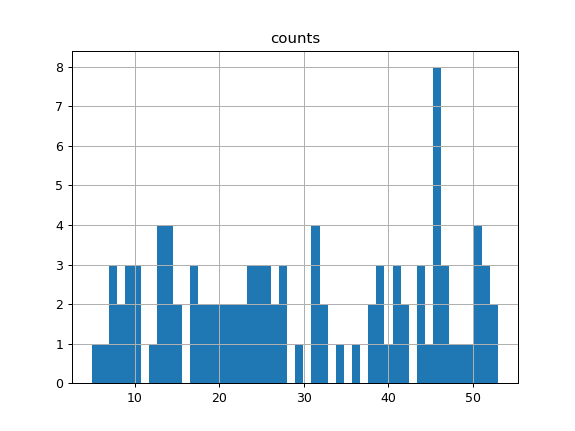

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x12a6baac8>]],
      dtype=object)

In [140]:
hist = df.groupby(by="SessionID").size().reset_index(name='counts').sort_values(by="counts")
hist.hist(bins=50)

In [59]:
df["s"] = 1
df.head()

<IPython.core.display.Javascript object>


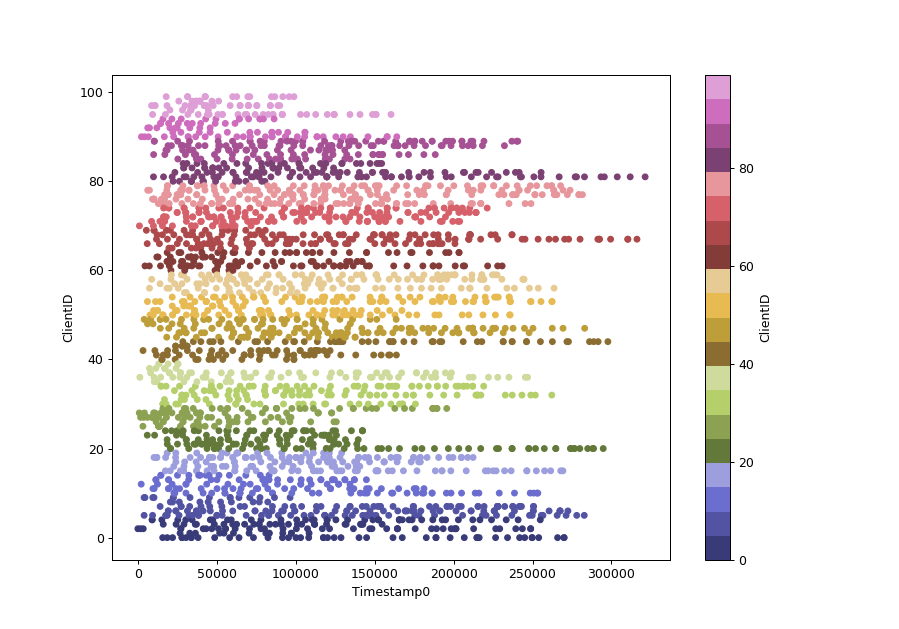

In [142]:
df.plot.scatter(x='Timestamp0',
                 y='ClientID',
                 c='ClientID',
                 colormap='tab20b', figsize=(10, 7))

<IPython.core.display.Javascript object>


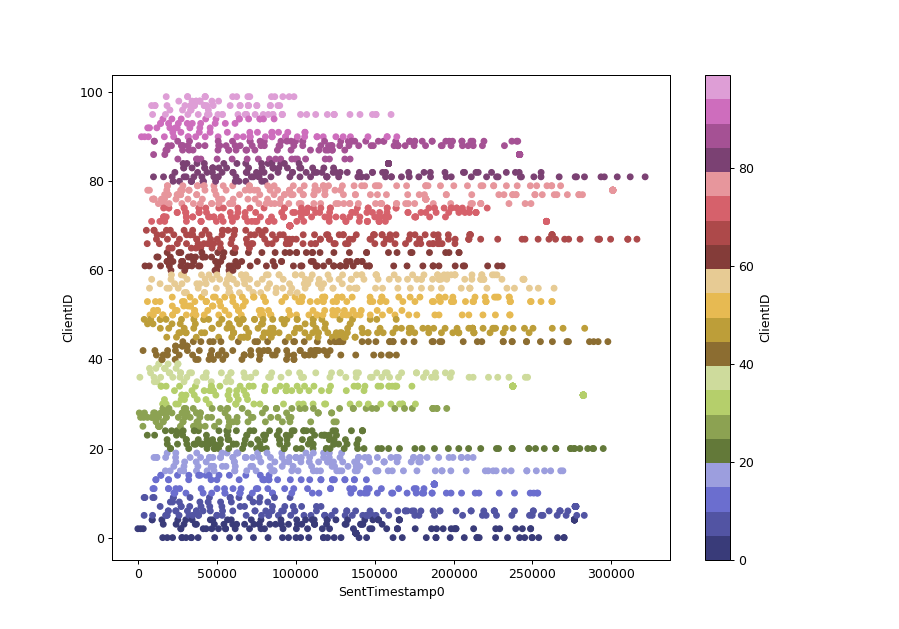

In [146]:
df.plot.scatter(x='SentTimestamp0',
                 y='ClientID',
                 c='ClientID',
                 colormap='tab20b', figsize=(10, 7))